In [45]:
# 1.	Import the necessary libraries (numpy, pandas, scikit-learn packages metrics and clustering)
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
# 2.	Import the NYC property prediction dataset available at https://www.kaggle.com/gcdatkin/nyc-property-price-prediction
data = pd.read_csv("D:\\Vinina Office\\FinalLORs\\StudentDocs\\collegeInfo\\CS989\\nyc-rolling-sales.csv")

In [146]:
# 3.	Starting EDA(Exploratory Data Analysis)
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
#See column names and see  if any null values in rows
data.keys()
data.isnull().any()

In [4]:
#Check number of rows and columns
data.shape

(84548, 22)

In [22]:
#Check columns and data type in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [90]:
data.corr()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
Unnamed: 0,1.000000,0.088817,0.264130,-0.031601,0.166882,-0.013318,-0.002821,-0.012856,-0.004057,0.017395
BOROUGH,0.088817,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163
BLOCK,0.264130,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300
LOT,-0.031601,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680
ZIP CODE,0.166882,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915
RESIDENTIAL UNITS,-0.013318,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074
COMMERCIAL UNITS,-0.002821,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586
TOTAL UNITS,-0.012856,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429
YEAR BUILT,-0.004057,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609
TAX CLASS AT TIME OF SALE,0.017395,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000


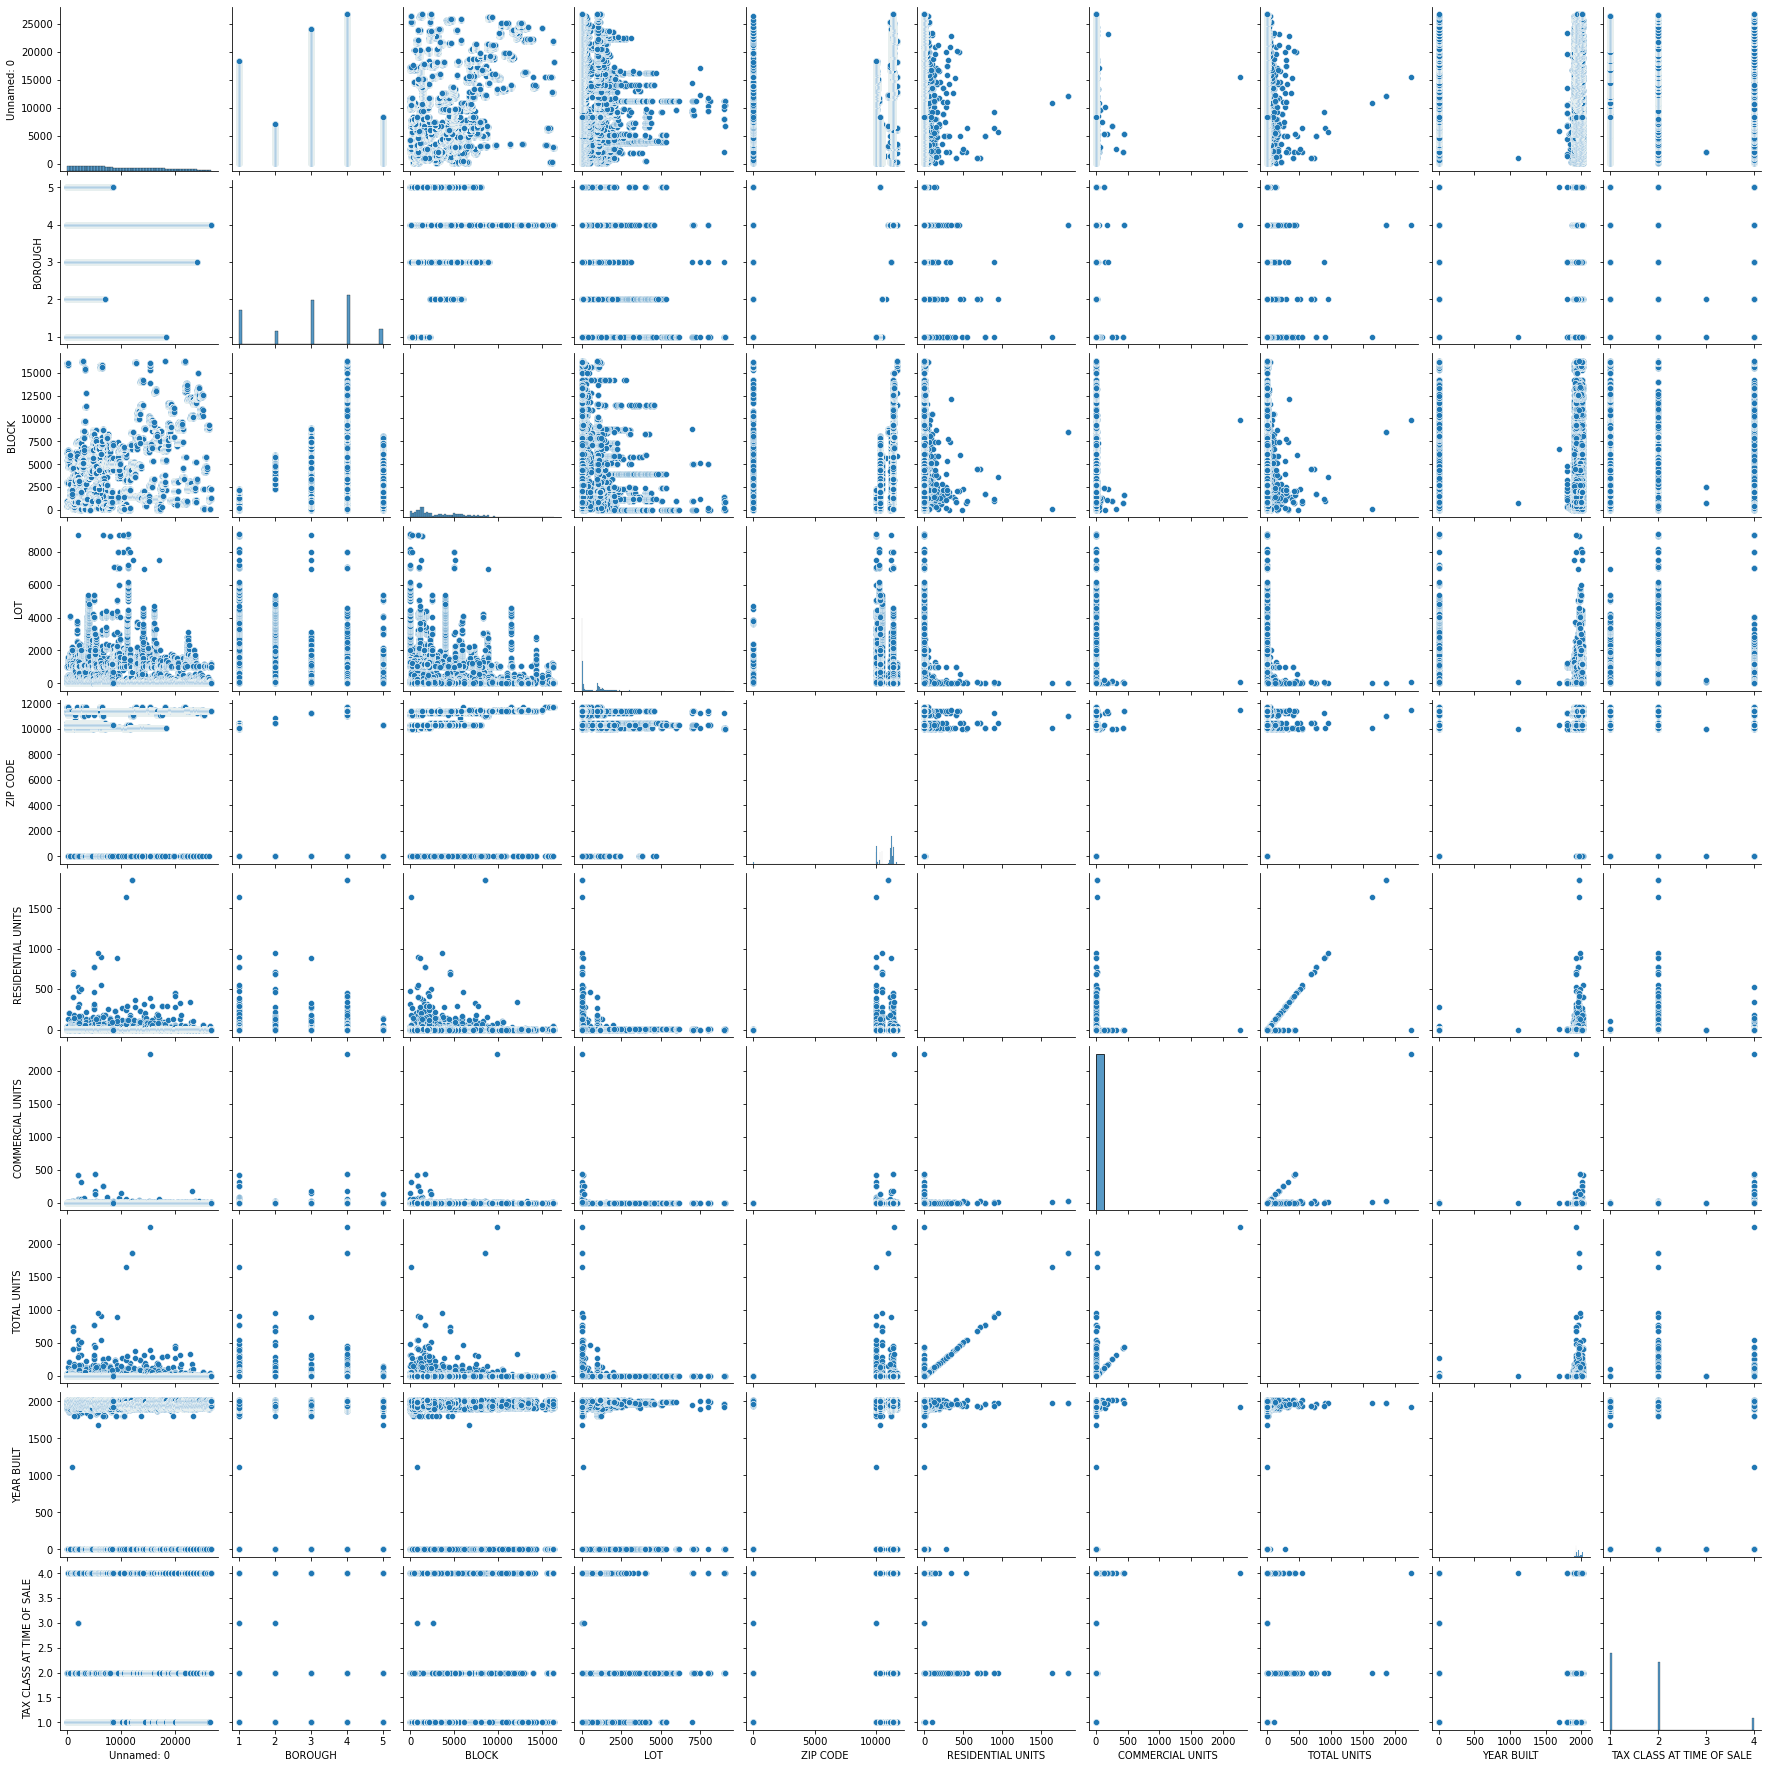

In [91]:
sns.pairplot(data)

In [124]:
#Function says no null value though there is "-" which is equivalent to null
data['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [16]:
#to check if there are any missing values in other columns haivng data type object
{column: data[column].unique() for column in data.select_dtypes('object').columns}

{'NEIGHBORHOOD': array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
        'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
        'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
        'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
        'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
        'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
        'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
        'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
        'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
        'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
        'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
        'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
        'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
        'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
        'CITY ISLAND-PELHAM STRIP', 'CO-

In [5]:
#checking categorial data
categorical = data.select_dtypes(include=['object'])
categorical.head().transpose() # Transposing to make visualization better

,0,1,2,3,4
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX CLASS AT PRESENT,2A,2,2,2B,2A
EASE-MENT,,,,,
BUILDING CLASS AT PRESENT,C2,C7,C7,C4,C2
ADDRESS,153 AVENUE B,234 EAST 4TH STREET,197 EAST 3RD STREET,154 EAST 7TH STREET,301 EAST 10TH STREET
APARTMENT NUMBER,,,,,
LAND SQUARE FEET,1633,4616,2212,2272,2369
GROSS SQUARE FEET,6440,18690,7803,6794,4615
BUILDING CLASS AT TIME OF SALE,C2,C7,C7,C4,C2


In [6]:
categorical.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
EASE-MENT,84548,1,,84548
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,84548,3989,,65496
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


In [18]:
#Replacing columns having ' ' as rows with Nan and '-' with NaN in Sale price column
data['SALE PRICE']= data['SALE PRICE'].replace(' -  ',np.NaN)
data['BUILDING CLASS AT PRESENT']= data['BUILDING CLASS AT PRESENT'].replace(' ',np.NaN)
data['EASE-MENT']= data['EASE-MENT'].replace(' ',np.NaN)
data['APARTMENT NUMBER']= data['APARTMENT NUMBER'].replace(' ',np.NaN)
data['TAX CLASS AT PRESENT']= data['TAX CLASS AT PRESENT'].replace(' ',np.NaN)

In [212]:
#Get exact count of null values in columns
data.isna().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [6]:
#Columns LAND SQUARE FEET and GROSS SQUARE FEET appear in type object although they have integer values
#Trying converting to float gives error as '- ' is present
data['LAND SQUARE FEET'].astype(np.float)

<ipython-input-6-82bc3b53f212>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['LAND SQUARE FEET'].astype(np.float)


ValueError: could not convert string to float: ' -  '

In [98]:
#Check the same for GROSS SQUARE FEET
data['GROSS SQUARE FEET'].astype(np.float)

<ipython-input-98-99c2dbd0936b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['GROSS SQUARE FEET'].astype(np.float)


ValueError: could not convert string to float: ' -  '

In [47]:
#replacing '-' with NaN
data['GROSS SQUARE FEET']= data['GROSS SQUARE FEET'].replace(' -  ',np.NaN)
data['LAND SQUARE FEET']= data['LAND SQUARE FEET'].replace(' -  ',np.NaN)
#data['SALE PRICE'] = data['SALE PRICE'].apply(lambda p: p if type(p) == int else 0)

In [131]:
#Get exact count of null values in columns
data.isna().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
GROSS SQUARE FEET                 27612
LAND SQUARE FEET                  26252
SALE PRICE                        14561
YEAR BUILT                         6970
ZIP CODE                            982
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
COMMERCIAL UNITS                      0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
TOTAL UNITS                           0
Unnamed: 0                            0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [114]:
#Check if other numerical columns have missing values
{column: data[column].unique() for column in data.select_dtypes('int64').columns}

{'Unnamed: 0': array([    4,     5,     6, ..., 26737, 26738, 26739], dtype=int64),
 'BOROUGH': array([1, 2, 3, 4, 5], dtype=int64),
 'BLOCK': array([ 392,  399,  402, ..., 6918, 7074, 7092], dtype=int64),
 'LOT': array([  6,  26,  39, ..., 655, 423, 679], dtype=int64),
 'ZIP CODE': array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
        10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
        10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
        10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
        10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
        10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
        10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
        10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
        10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
        11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       

In [15]:
#Sum of null values in all columns
data.isna().sum().sort_values(ascending=False)

EASE-MENT                         69987
APARTMENT NUMBER                  54491
YEAR BUILT                         5391
ZIP CODE                            778
TAX CLASS AT PRESENT                673
BUILDING CLASS AT PRESENT           673
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
Unnamed: 0                            0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [133]:
#now we have all the missing values
#now change columns types to make plots for important columns

In [48]:
#SALE DATE is object but should be datetime
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], format= '%Y-%m-%d %H:%M:%S')

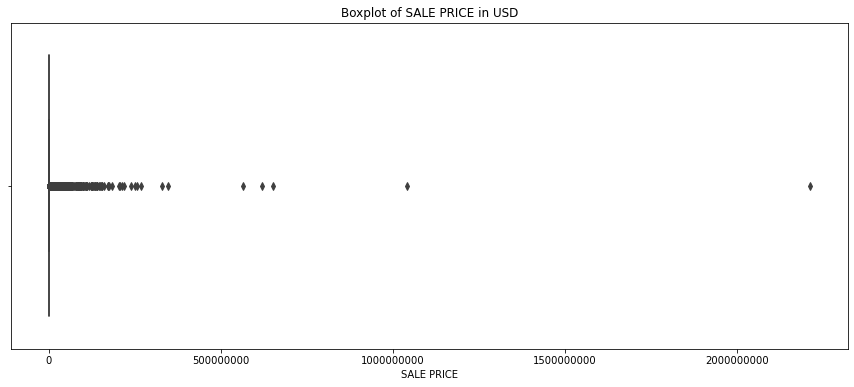

In [153]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [ ]:
#now deal with missing values in Sale price and LAND SQUARE FEET and GROSS SQUARE FEET

In [266]:
#Check percentage of dataset having SALE PRICE as null
data.isna().mean()

Unnamed: 0                        0.0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [49]:
#dropping 17.2% records from dataset as it has missing values in SALE PRICE
data = data.dropna(subset=['SALE PRICE']).reset_index(drop=True)

In [50]:
#SALE PRICE should be numerical
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

In [51]:
#Filling missing values of LAND SQUARE FEET and GROSS SQUARE FEET with column means and converting both columns to numeric type
for column in ['LAND SQUARE FEET', 'GROSS SQUARE FEET']:
      data[column] = data[column].astype(float)
      data[column] = data[column].fillna(data[column].mean())

In [52]:
#dropping unnecessary columns
#EASE-MENT column has no data
#APARTMENT NUMBER column has almost 50% empty data
#Address column also not required
data.drop(["EASE-MENT", "ADDRESS", "APARTMENT NUMBER", "Unnamed: 0"], axis = 1, inplace = True)

In [156]:
#Further analyse the values in numerical columns
numerical = data.select_dtypes(exclude=['object'])
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    69987 non-null  int64         
 1   BLOCK                      69987 non-null  int64         
 2   LOT                        69987 non-null  int64         
 3   ZIP CODE                   69987 non-null  int64         
 4   RESIDENTIAL UNITS          69987 non-null  int64         
 5   COMMERCIAL UNITS           69987 non-null  int64         
 6   TOTAL UNITS                69987 non-null  int64         
 7   LAND SQUARE FEET           69987 non-null  float64       
 8   GROSS SQUARE FEET          69987 non-null  float64       
 9   YEAR BUILT                 69987 non-null  int64         
 10  TAX CLASS AT TIME OF SALE  69987 non-null  int64         
 11  SALE PRICE                 69987 non-null  int64         
 12  SALE

In [110]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,69987.0,2.921928e+00,1.235688e+00,1.0,2.0,3.0,4.000000,5.000000e+00
BLOCK,69987.0,4.196073e+03,3.429197e+03,1.0,1348.0,3378.0,6186.000000,1.631900e+04
LOT,69987.0,3.738284e+02,6.560965e+02,1.0,22.0,50.0,709.000000,9.106000e+03
ZIP CODE,69987.0,1.074146e+04,1.263235e+03,0.0,10306.0,11209.0,11249.000000,1.169400e+04
RESIDENTIAL UNITS,69987.0,1.899553e+00,1.454954e+01,0.0,0.0,1.0,2.000000,1.844000e+03
COMMERCIAL UNITS,69987.0,1.724892e-01,9.123717e+00,0.0,0.0,0.0,0.000000,2.261000e+03
TOTAL UNITS,69987.0,2.092203e+00,1.727610e+01,0.0,0.0,1.0,2.000000,2.261000e+03
LAND SQUARE FEET,69987.0,3.629395e+03,3.369949e+04,0.0,1900.0,2946.0,3629.395152,4.252327e+06
GROSS SQUARE FEET,69987.0,3.672552e+03,2.447312e+04,0.0,1268.0,2400.0,3672.552251,3.750565e+06
YEAR BUILT,69987.0,1.799348e+03,5.208846e+02,0.0,1920.0,1937.0,1965.000000,2.017000e+03


In [53]:
#Some columns have value as 0 which is not acceptable
#ZIP CODE, TOTAL UNITS, GROSS SQUARE FEET and YEAR BUILT
#checking number of zeroes in each column
zero_columns_value=[
    "ZIP CODE",
    "GROSS SQUARE FEET",
    "YEAR BUILT",
    "SALE PRICE"
   ]

l = len(data)
for col in zero_columns_value:
    print(f"{col:.10}\t{len(data[data[col] == 0])/l:0.2f}% missing")

ZIP CODE	0.01% missing
GROSS SQUA	0.14% missing
YEAR BUILT	0.08% missing
SALE PRICE	0.12% missing


In [54]:
for col in zero_columns_value:
    data = data[data[col] != 0]

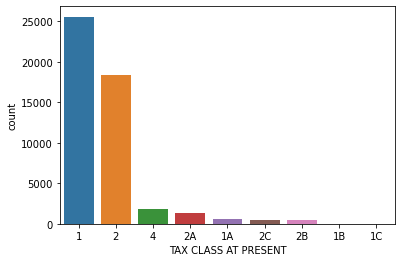

In [36]:
#plot the relationship of the features to the target and look for outliers
sns.countplot(
    x="TAX CLASS AT PRESENT",
    data = data,
    order = data["TAX CLASS AT PRESENT"].value_counts().index,
)
plt.show()

<AxesSubplot:title={'center':'Total Sale Price vs Tax Class'}, xlabel='TAX CLASS AT PRESENT'>

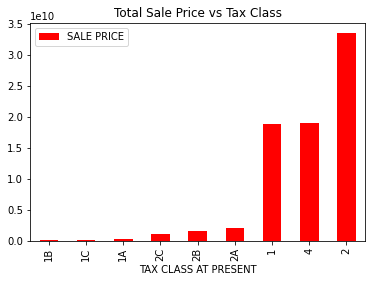

In [37]:
pivot = data.pivot_table(index='TAX CLASS AT PRESENT',
                       values='SALE PRICE',
                       aggfunc=np.sum,).sort_values("SALE PRICE")

pivot.plot(
    kind='bar',
    color='red',
    title="Total Sale Price vs Tax Class"
)

<AxesSubplot:title={'center':'Average Price vs Tax Class'}, xlabel='TAX CLASS AT PRESENT'>

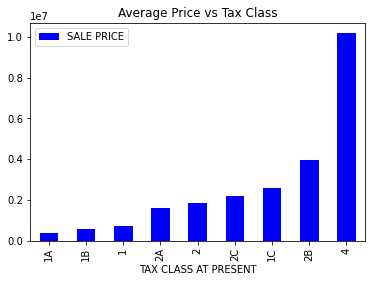

In [38]:
pivot = data.pivot_table(index='TAX CLASS AT PRESENT',
                       values='SALE PRICE',
                       aggfunc=np.mean).sort_values("SALE PRICE")
pivot.plot(kind='bar',
           color='blue',
           title="Average Price vs Tax Class"
          )

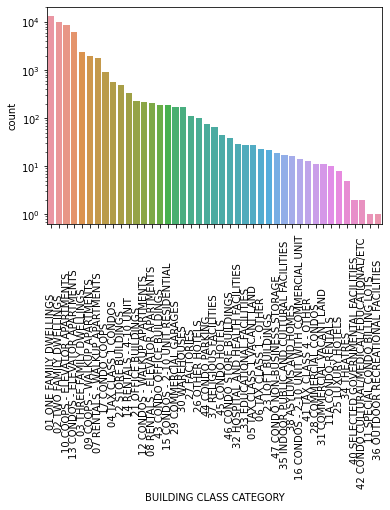

In [294]:
g = sns.countplot(
    x='BUILDING CLASS CATEGORY',
    data = data,
    order = data["BUILDING CLASS CATEGORY"].value_counts().index,
)
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:xlabel='BUILDING CLASS CATEGORY'>

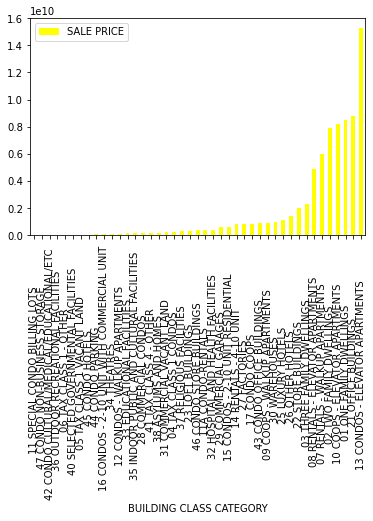

In [39]:
pivot = data.pivot_table(index='BUILDING CLASS CATEGORY',
                       values='SALE PRICE',
                       aggfunc=np.sum).sort_values("SALE PRICE")
pivot.plot(kind='bar', color = 'yellow')

In [229]:
data['BUILDING CLASS CATEGORY'].value_counts().head(15)

01 ONE FAMILY DWELLINGS                        12995
02 TWO FAMILY DWELLINGS                        10138
10 COOPS - ELEVATOR APARTMENTS                  8708
13 CONDOS - ELEVATOR APARTMENTS                 6179
03 THREE FAMILY DWELLINGS                       2405
09 COOPS - WALKUP APARTMENTS                    1967
07 RENTALS - WALKUP APARTMENTS                  1801
17 CONDO COOPS                                   910
04 TAX CLASS 1 CONDOS                            562
22 STORE BUILDINGS                               491
14 RENTALS - 4-10 UNIT                           336
21 OFFICE BUILDINGS                              227
12 CONDOS - WALKUP APARTMENTS                    211
08 RENTALS - ELEVATOR APARTMENTS                 207
43 CONDO OFFICE BUILDINGS                        190
Name: BUILDING CLASS CATEGORY, dtype: int64

In [55]:
#To reduce the complexity of our model, keeping the most representative BUIDING CLASS CATEGORY
top_vals = data['BUILDING CLASS CATEGORY'].value_counts().index[:5]
data = data[data["BUILDING CLASS CATEGORY"].isin(top_vals)]

<AxesSubplot:>

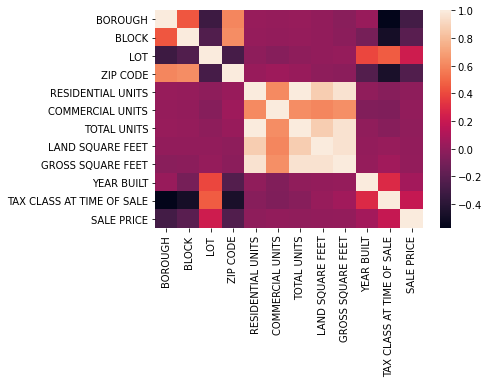

In [374]:
#show correlation between numerical values
numerical = data.select_dtypes(exclude=['object', 'datetime'])
sns.heatmap(numerical.corr()) #, annot= True)

In [56]:
#huge correlation between LAND SQUARE FEET and GROSS SQUARE FEET and between RESIDENTIAL UNITS and TOTAL UNITS
#keep only one of the features
data.drop(["RESIDENTIAL UNITS", "LAND SQUARE FEET"], axis = 1, inplace = True)

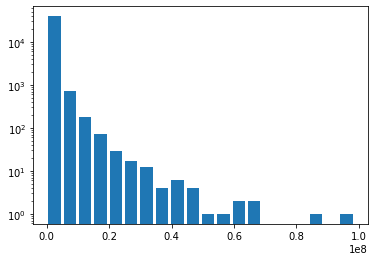

In [44]:
plt.hist(
    data["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
)
plt.show()

In [57]:
#remove outliers as per above hist
data = data[(data['SALE PRICE'] < 5e8) & (data['SALE PRICE'] > 1e5)]

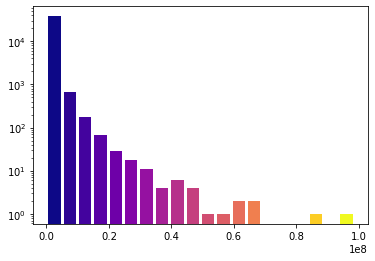

In [20]:
# Ploting histogram by scaling colours in x-axis
n, bins, patches = plt.hist(
    data["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
) 
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scaling values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

cm = plt.cm.get_cmap('plasma')
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

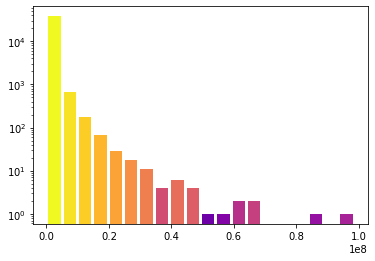

In [47]:
n, bins, patches = plt.hist(
    data["SALE PRICE"],
    bins = 20,
    log = True,
    rwidth = 0.8
) 

bin_centers = 0.5 * (bins[:-1] + bins[1:])

sorted_patches = [p for _,p in sorted(zip(n,patches), key=lambda pair: pair[0])] #sorts patches in respect to n
sorted_centers = [c for _,c in sorted(zip(n, bin_centers), key=lambda pair: pair[0])] #sorts bin_centers in respect to n

# scaliing values to interval [0,1]
col = sorted_centers - min(sorted_centers)
col /= max(col)
col = sorted(col)
cm = plt.cm.get_cmap('plasma')
for c, p in zip(col, sorted_patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

In [58]:
#Sale Price feature is skewed
data["SALE PRICE"].skew()

13.959247887812634

In [59]:
#removing skewiness
sale_price = np.log(data["SALE PRICE"])
print(sale_price.skew())

0.9290904504518023


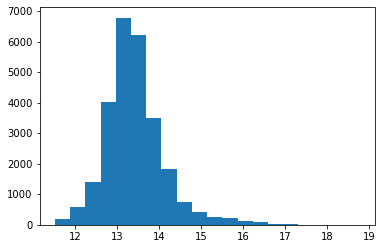

In [146]:
plt.hist(sale_price, bins =20)
plt.show()

<AxesSubplot:xlabel='BOROUGH'>

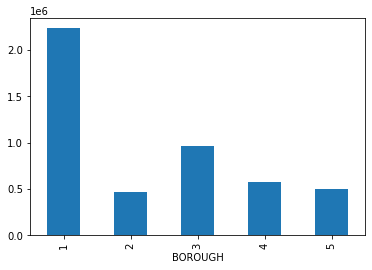

In [161]:
data.groupby("BOROUGH").mean()['SALE PRICE'].plot(kind='bar') 

In [107]:
data['TOTAL UNITS'].value_counts()

1       18380
2        9416
0        8507
3        2676
295         2
96          2
78          2
48          1
286         1
60          1
58          1
121         1
152         1
120         1
150         1
86          1
14          1
143         1
462         1
12          1
1866        1
136         1
102         1
324         1
68          1
193         1
446         1
Name: TOTAL UNITS, dtype: int64

In [60]:
#Splitting Sale dAte column values in years and months to make plots
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['SALE DATE'].dtype
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['YEAR SOLD'] = (data['SALE DATE']).dt.year
data['MONTH SOLD']= (data['SALE DATE']).dt.month

Text(0.5, 1.0, 'Sales per Borough from 2016-2017')

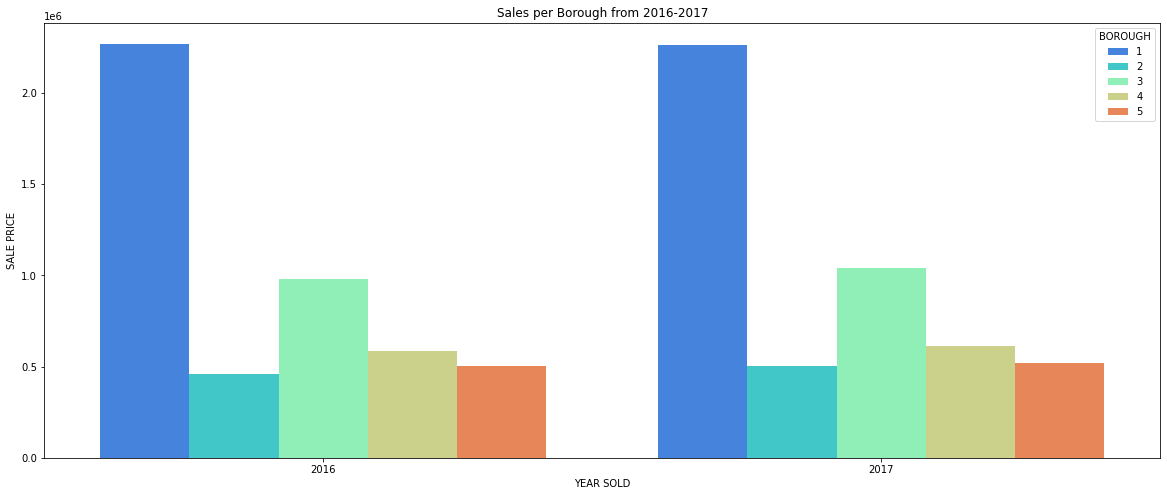

In [60]:
plt.subplots(figsize=(20,8))
sns.barplot(x='YEAR SOLD', y='SALE PRICE', hue='BOROUGH', data=data, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2016-2017')

C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales per Borough')

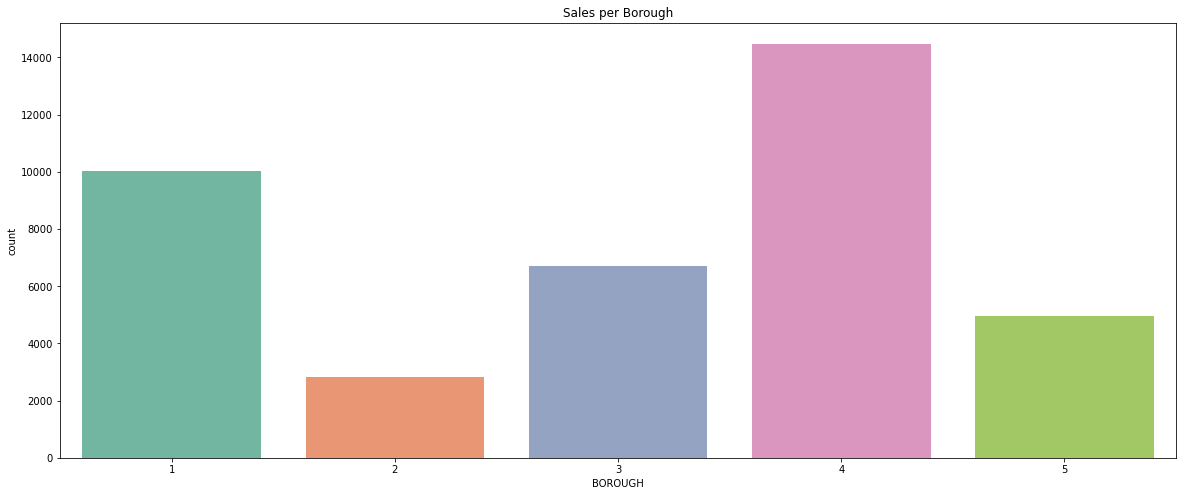

In [25]:
plt.subplots(figsize=(20,8))
sns.countplot('BOROUGH',data=data,palette='Set2')
plt.title('Sales per Borough')

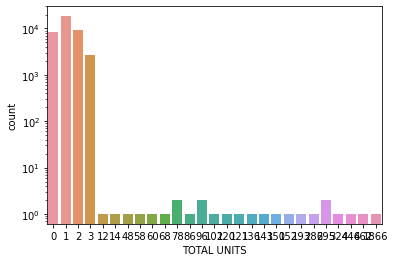

In [26]:
sns.countplot(x='TOTAL UNITS', data = data, log=True)
plt.show()

In [61]:
#keeping limited values for TOTAL UNITS for simplification
data = data[data['TOTAL UNITS'] < 50]

In [193]:
#Using Tax Class and Borough as categorical data
data['TAX CLASS AT TIME OF SALE'].value_counts()
data['BOROUGH'].value_counts()

4    14473
1    10017
3     6710
5     4966
2     2816
Name: BOROUGH, dtype: int64

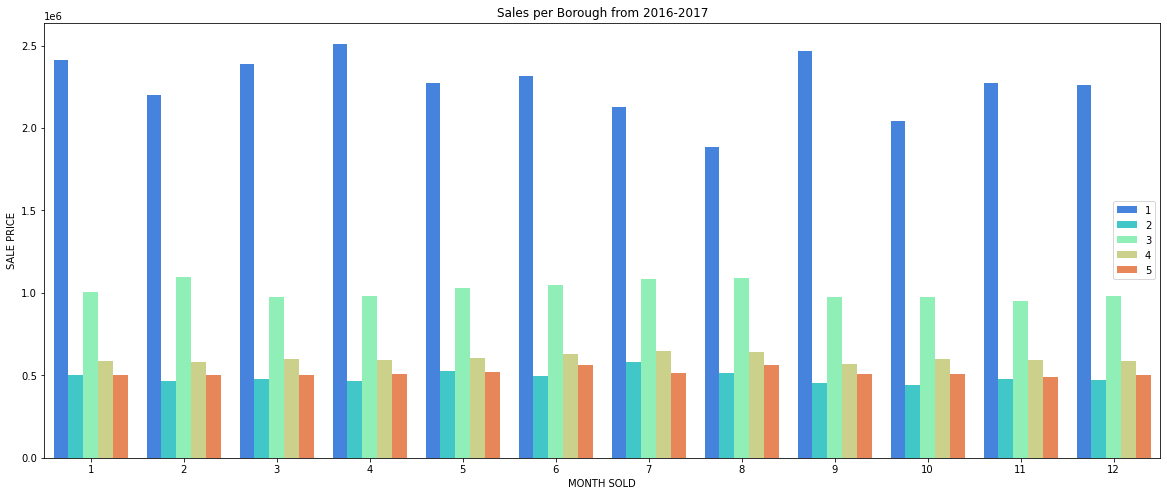

In [63]:
plt.figure(figsize=(20,8))
sns.barplot(x='MONTH SOLD', y='SALE PRICE', hue='BOROUGH', data=data, palette='rainbow', ci=None)
plt.title('Sales per Borough from 2016-2017')
plt.legend(loc='right')

C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH SOLD', ylabel='count'>

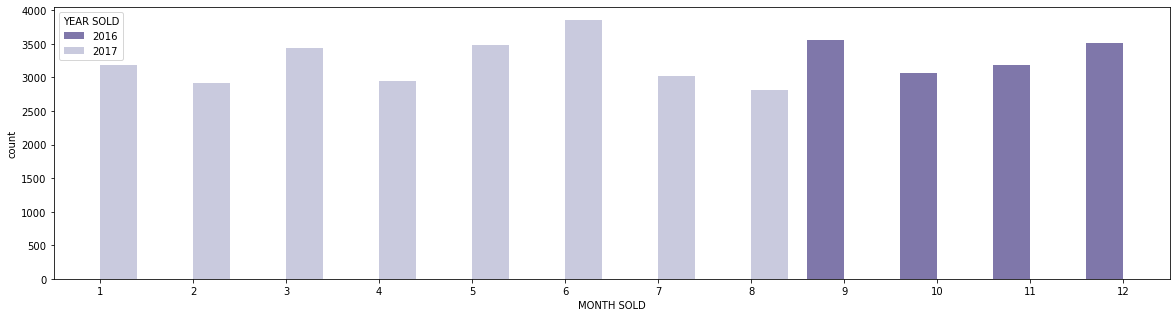

In [30]:
plt.figure(figsize=(20,5))
sns.countplot('MONTH SOLD', hue='YEAR SOLD', data=data, palette='Purples_r')

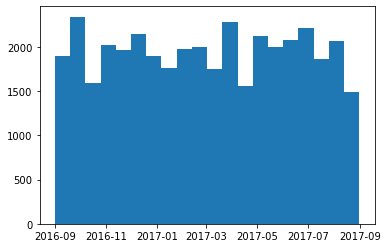

In [31]:
#Check time series for Sale Date
plt.hist(data['SALE DATE'], bins=20)
plt.show()

C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

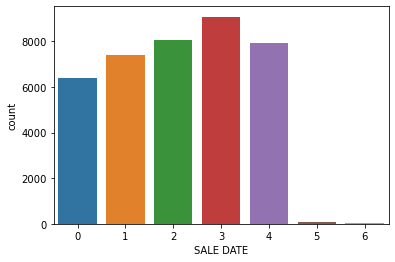

In [32]:
sns.countplot(data["SALE DATE"].dt.dayofweek)

C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

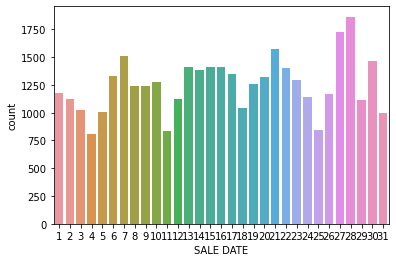

In [19]:
data['day'] = data["SALE DATE"].dt.dayofweek
data = data[data["day"] < 5 ]
data.drop(["day"], axis =1, inplace = True)
sns.countplot(data["SALE DATE"].dt.day)

<AxesSubplot:>

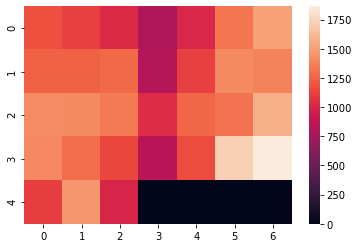

In [34]:
#ploting the monthly sales
month = np.empty(5 * 7)
for day, count in data["SALE DATE"].dt.day.value_counts().iteritems():
    month[int(day) -1] = count
month = month.reshape((5,7))
sns.heatmap(month)

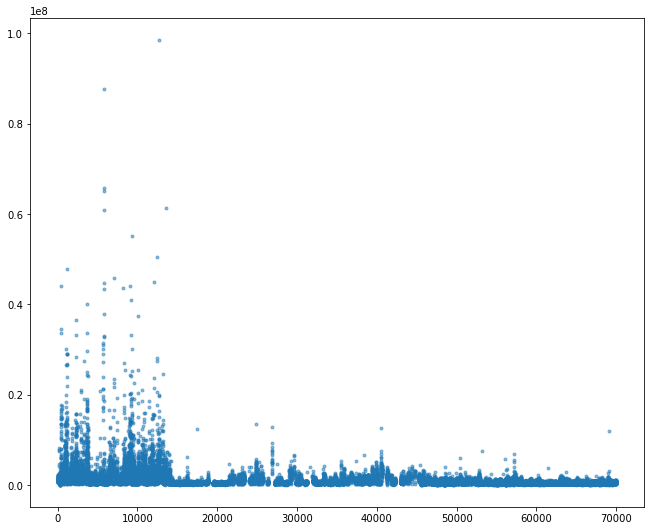

In [57]:
#time series visualization
axes = data["SALE PRICE"].plot(
    marker='.',
    alpha=0.5,
    linestyle='',
    figsize=(11, 9),
    subplots=True

)

In [113]:
#creating a duplicate dataset for manipulation
duplicateData= data.copy()

In [119]:
duplicateData.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,YEAR_SOLD,MONTH_SOLD
59,1,ALPHABET CITY,10 COOPS - ELEVATOR APARTMENTS,2,379,45,D0,10009,0,0,3672.552251,1920,2,D0,499900,2017-04-13,2017,4
60,1,ALPHABET CITY,10 COOPS - ELEVATOR APARTMENTS,2,386,36,D0,10009,0,0,3672.552251,1940,2,D0,1400000,2017-05-11,2017,5
61,1,ALPHABET CITY,10 COOPS - ELEVATOR APARTMENTS,2,386,58,D4,10009,0,0,3672.552251,1900,2,D4,694000,2016-09-29,2016,9
66,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009,0,1,3672.552251,1920,2,R4,762669,2016-09-21,2016,9
67,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009,0,1,3672.552251,1920,2,R4,772851,2016-09-12,2016,9


In [115]:
#To get sale price as per neighbourhood
#duplicateData.columns = [c.replace(' ', '_') for c in duplicateData.columns]
#from collections import Counter
#NEIGHBORHOOD = list(dict(Counter(duplicateData.NEIGHBORHOOD).most_common(20)).keys())

#avg_sale_prices = []
#for i in NEIGHBORHOOD:
 #   avg_price = np.mean(data.SALE_PRICE[duplicateData.NEIGHBORHOOD == i])
 #   avg_sale_prices.append(avg_price)

AttributeError: 'DataFrame' object has no attribute 'SALE_PRICE'

In [117]:
#Graph depending on neighbourhood 
#plt.figure(figsize=(20,8))
#sns.barplot(x= avg_sale_prices, y= NEIGHBORHOOD , ci=None)
#plt.title('Average House Price in the top 20 neighborhoods')

KeyError: 'FLUSHING-NORTH'

<Figure size 1440x576 with 0 Axes>

In [34]:
#data preparation for regression
#checking data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38982 entries, 59 to 69984
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         38982 non-null  int64         
 1   NEIGHBORHOOD                    38982 non-null  object        
 2   BUILDING CLASS CATEGORY         38982 non-null  object        
 3   TAX CLASS AT PRESENT            38980 non-null  object        
 4   BLOCK                           38982 non-null  int64         
 5   LOT                             38982 non-null  int64         
 6   BUILDING CLASS AT PRESENT       38980 non-null  object        
 7   ZIP CODE                        38982 non-null  int64         
 8   COMMERCIAL UNITS                38982 non-null  int64         
 9   TOTAL UNITS                     38982 non-null  int64         
 10  GROSS SQUARE FEET               38982 non-null  float64       
 11  Y

In [62]:
#dropping few features for easeness
data.drop([
    "BUILDING CLASS AT PRESENT",
    "BUILDING CLASS AT TIME OF SALE",
    "NEIGHBORHOOD",
    "TAX CLASS AT PRESENT"
], axis = 1, inplace = True)

In [21]:
data['TAX CLASS AT TIME OF SALE'].value_counts()

1    24296
2    14586
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [63]:
#converting datetime data to float
data["SALE DATE"] = pd.to_numeric(data["SALE DATE"])

In [69]:
#removing skewenes from  numerical columns
numericCol = data.select_dtypes(exclude=['object']).columns.tolist()
numericCol.remove("SALE DATE")

# Removing skewness from features
for col in numericCol:
    if data[col].skew() > 1:
        data[col] = np.log1p(data[col])

In [ ]:
data.info()

In [70]:
#unsupervised learning start
#scaling the data
from sklearn.preprocessing import scale
X= data.loc[ :, ['TOTAL UNITS','YEAR BUILT','ZIP CODE','LOT','BLOCK','BOROUGH']].values
X_1 = scale(X)
X_1

array([[-1.62988622, -0.89364274, -1.3401903 , -0.11135363, -1.07924087,
        -1.44992533],
       [-1.62988622, -0.28673618, -1.3401903 , -0.23625121, -1.0773883 ,
        -1.44992533],
       [-1.62988622, -1.5005493 , -1.3401903 ,  0.03142617, -1.0773883 ,
        -1.44992533],
       ...,
       [ 0.97431707,  1.47329284, -0.83416197, -0.26812898,  0.76539141,
         1.39321854],
       [ 0.97431707,  1.47329284, -0.83416197,  0.19888125,  0.76539141,
         1.39321854],
       [ 0.97431707, -0.7419161 , -0.83416197,  0.05054968,  0.76592072,
         1.39321854]])

In [ ]:
#Using Dendrogram to find number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram((sch.linkage(X_1, method ='ward')))

In [ ]:
#AgglomerativeClustering#
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
n_samples, n_features = X_1.shape
model = cluster.AgglomerativeClustering(n_clusters=4, linkage="average", affinity="euclidean")
model.fit(X_1)
print(model.labels_)
#Silhouette refers to a method of interpretation and validation of consistency within clusters of data
print("silhouette_score = ", metrics.silhouette_score(X_1, model.labels_))

In [71]:
#unsupervised Learning #K means clustering with respect to location and year built
from sklearn.cluster import KMeans
#X_1= data.loc[ :, ['TOTAL UNITS','YEAR BUILT','ZIP CODE','LOT','BLOCK','BOROUGH']].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)

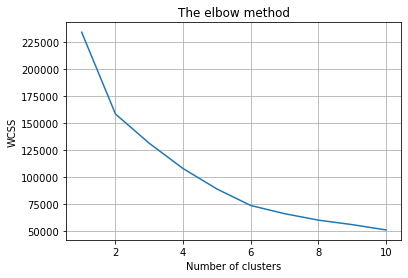

In [72]:
#plotting the elbow to chose number of clusters
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within cluster sum of squares
plt.grid(True)
plt.show()

In [73]:
# Applying kmeans
kmeans = KMeans(n_clusters = 6)
y_kmeans = kmeans.fit_predict(X_1)
print(y_kmeans)

[2 2 2 ... 5 5 1]


In [74]:
# Plotting the centroids of the clusters
print(kmeans.cluster_centers_)

[[ 0.00719055  0.83202893 -1.28907789  1.78698676 -0.90137081 -1.43343062]
 [ 0.77113191 -0.79071276  0.31906399 -0.31374369 -0.21733659  0.11720115]
 [-1.60975436 -0.22938037 -1.30290128 -0.60540605 -0.85446107 -1.44992533]
 [ 0.37912763 -0.28740899  0.98423243 -0.22428128  1.52046657  0.54775464]
 [-1.60603685  0.13688947  0.90322388 -0.72506459 -0.15532528  0.69011556]
 [ 0.32462473  1.23268056 -0.25925139  0.38491632 -0.16076366  0.98441996]]


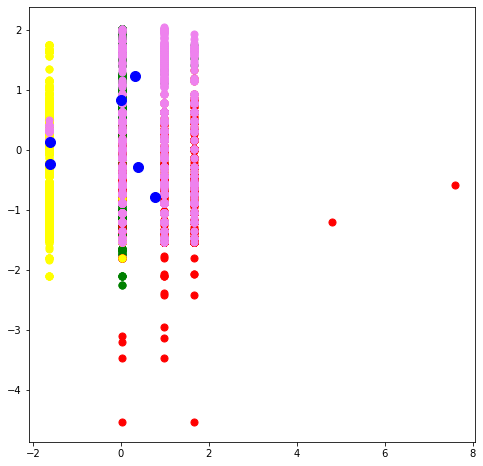

In [75]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X_1[y_kmeans==0,0], X_1[y_kmeans==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_1[y_kmeans==1,0], X_1[y_kmeans==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_1[y_kmeans==2,0], X_1[y_kmeans==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_1[y_kmeans==3,0], X_1[y_kmeans==3,1], s=50, c='violet', label='Cluster 4')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='blue', label='Centroids')

In [44]:
from sklearn.metrics import silhouette_score
print("silhouette_score = ", metrics.silhouette_score(X_1, kmeans.labels_))

silhouette_score =  0.3327177299790694


In [339]:
#supervised Learning start
#encoding categorial features using one hot encoding
one_hot_encoding = ['BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE']
dummies = pd.get_dummies(data[one_hot_encoding])
dummies = pd.concat([dummies, pd.get_dummies(data["BOROUGH"])], axis=1) #BOROUGH are integers, doing seperately
dummies.info(verbose=True, memory_usage=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38982 entries, 59 to 69984
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   TAX CLASS AT TIME OF SALE                                            38982 non-null  int64
 1   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                      38982 non-null  uint8
 2   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                      38982 non-null  uint8
 3   BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                    38982 non-null  uint8
 4   BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS               38982 non-null  uint8
 5   BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS              38982 non-null  uint8
 6   1                                                                    38982 non-null  uint8
 7   2                    

In [340]:
data.drop(['BUILDING CLASS CATEGORY', 'TAX CLASS AT TIME OF SALE', 'BOROUGH'], axis = 1, inplace = True)
data = pd.concat([data, dummies], axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38982 entries, 59 to 69984
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   BLOCK                                                                38982 non-null  int64  
 1   LOT                                                                  38982 non-null  float64
 2   ZIP CODE                                                             38982 non-null  int64  
 3   COMMERCIAL UNITS                                                     38982 non-null  float64
 4   TOTAL UNITS                                                          38982 non-null  float64
 5   GROSS SQUARE FEET                                                    38982 non-null  float64
 6   YEAR BUILT                                                           38982 non-null  int64  
 7   SAL

In [341]:
#separating train and test
from sklearn.model_selection import train_test_split

features = data.drop(["SALE PRICE"], axis = 1)
target = data["SALE PRICE"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [342]:
print("LINEAR REGRESSION")
print("**************************************")
print("Prediction on Test data")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression(normalize = True)
lm.fit(x_train, y_train)
predicted = lm.predict(x_test)
print(lm.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:',mean_squared_error(y_test, predicted) ** 0.5)
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted))) 

LINEAR REGRESSION
**************************************
Prediction on Test data
0.5131946355247053
Mean Absolute Error: 0.4009815904739132
Mean Squared Error: 0.5518306924750648
Root Mean Squared Error: 0.5518306924750648


In [343]:
coeff_df = pd.DataFrame(lm.coef_,features.columns,columns=['Coefficient'])

In [344]:
coeff_df

,Coefficient
BLOCK,-4.203341e-05
LOT,-9.493327e-03
ZIP CODE,-8.616555e-04
COMMERCIAL UNITS,2.224289e-02
TOTAL UNITS,-2.577757e-01
GROSS SQUARE FEET,6.253298e-01
YEAR BUILT,5.407318e-04
SALE DATE,-5.462996e-18
YEAR SOLD,2.834009e-01
MONTH SOLD,2.392273e-02


0.5129229180836976
Mean Absolute Error: 0.4013326775171668
Mean Squared Error: 0.30468708377979187
Root Mean Squared Error: 0.5519846771240954


C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


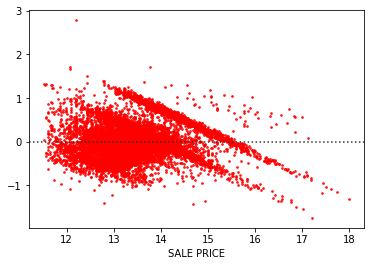

In [345]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lreg = LinearRegression(normalize = True)
y_pred = cross_val_predict(lreg, x_test, y_test, cv=50)
sns.residplot(y_test, y_pred, color="red", scatter_kws={"s": 3})
print(r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

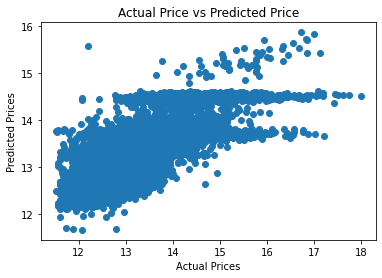

In [346]:
plt.scatter(y_test,predicted)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

C:\Users\Vibin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


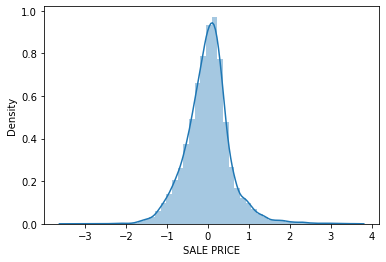

In [347]:
sns.distplot((y_test-predicted),bins=50); 